In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression,RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
plt.style.use('ggplot')
%matplotlib inline

In [57]:
df=pd.read_csv(r"C:\nydsa bootcamp slides\Projects\3\git\machine-learning_house-prices\Chaoran\AmesDummiesOrdinal.csv",
               index_col=0)

In [58]:
df.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,...,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
Id,,,,,,,,,,,,,,,,,,,,,
1,65,8450,196,856,3,1,8,0,2,548,...,5,4,8,1,3,4,4,3,1,1
2,80,9600,0,1262,3,1,6,1,2,460,...,5,3,8,4,3,4,4,3,1,1
3,68,11250,162,920,3,1,6,1,2,608,...,5,4,8,4,3,4,4,3,1,1
4,60,9550,0,756,3,1,7,1,3,642,...,4,4,8,5,2,4,4,3,1,1
5,84,14260,350,1145,4,1,9,1,3,836,...,5,4,8,4,3,4,4,3,1,1


In [59]:
df.shape

(1460, 186)

## SalePrice ~ all other varilables

In [60]:
SalePrice=df.SalePrice
Ames_df=df.drop('SalePrice',axis=1)

In [61]:
Ames_df.shape

(1460, 185)

In [62]:
ridge=Ridge()

### Ridge

In [63]:
# Split the Ames_df into a 70% train-set and a 30% test set.
testIdxes = np.random.choice(range(1460), size= 438, replace=False)
trainIdxes = list(set(range(1460))-set(testIdxes))
trainX = Ames_df.iloc[trainIdxes]
testX  = Ames_df.iloc[testIdxes]
trainY = SalePrice.iloc[trainIdxes]
testY  = SalePrice.iloc[testIdxes]

In [64]:
rtrain_coefs = []
rtrain_intercepts = []
rtrain_R2  = []
rtest_R2 = []

alphaRange = np.linspace(1e-3,200,40) # Use np.linspace to generate 40 alpha

#train the Ridge model
for alpha in alphaRange:
    ridge.set_params(alpha=alpha)
    ridge.fit(trainX,trainY)
    rtrain_intercepts.append(ridge.intercept_)
    rtrain_coefs.append(ridge.coef_)
    rtrain_R2.append(ridge.score(trainX,trainY))
    rtest_R2.append(ridge.score(testX,testY))


- Visualize the chagne of cofficients
 - we can see that when alpha is around 5, all variables get stable.

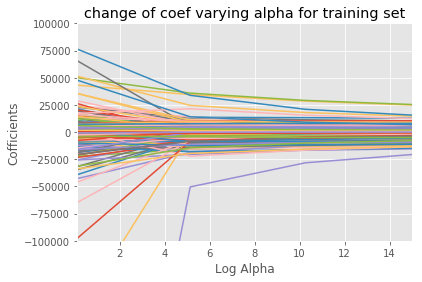

In [65]:
plt.style.use( 'ggplot')

plt.plot(alphaRange, rtrain_coefs)
plt.xlim((0.1,15))
plt.ylim((-100000,100000))
plt.title( 'change of coef varying alpha for training set')
plt.xlabel( 'Log Alpha')
plt.ylabel( 'Cofficients')
plt.show()

- The following plot shows the R2 change of the train and test sets
 - From this plot we also see the best alpha should be around 5 (at around 4 test set and train set has an intersection point, from 4 to 5 R2 of test set doesn't change much , R2 of train set decreses)

Text(0.5,1,'R2 of train and test sets')

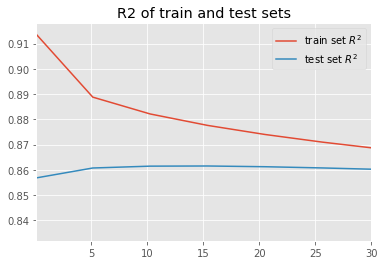

In [66]:
plt.plot(alphaRange, rtrain_R2, label=r'train set $R^2$')
plt.plot(alphaRange, rtest_R2, label=r'test set $R^2$')
plt.legend(loc='best')
plt.xlim((0.1,30))
plt.title( 'R2 of train and test sets')

#### Use k-fold Cross Validation to get the best alpha
- RidgeCV()

In [89]:
#kf=KFold(len(trainY),n_folds=10,shuffle=True)
ridge_cv = RidgeCV(alphas = alphaRange,cv=10)
ridge_cv.fit(trainX, trainY)
rbest_alpha=ridge_cv.alpha_
rbest_alpha=round(rbest_alpha,3) # keep 3 decimal places 

In [90]:
rbest_alpha # with KFold = 10, the best alpha shows as 15.386

15.386

In [91]:
ridge_cv.score(trainX,trainY)

0.8775921608010742

In [92]:
#Use alpha=5.129 to build the Ridge regression model again

ridge.set_params(alpha=15.386)
ridge.fit(trainX,trainY)
best_rtrain_intercept = ridge.intercept_
best_rtrain_coef= pd.Series(ridge.coef_,index=Ames_df.columns)
rtrain_score=ridge.score(trainX,trainY)
rtest_score= ridge.score(testX,testY)

In [93]:
rtest_score

0.8615125122490808

In [94]:
ridge_predict = ridge.predict(testX)
RMSE = np.sqrt(mean_squared_error(testY,ridge_predict))

In [95]:
RMSE

27066.05804973955

In [96]:
ridge_sortedCoefs=np.abs(best_rtrain_coef).sort_values(ascending=False)

In [97]:
ridge_sortedCoefs.index[0:100]

Index(['Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'RoofMatl_ClyTile',
       'LandContour_Bnk', 'RoofMatl_WdShngl', 'HouseStyle_2Story',
       'Neighborhood_StoneBr', 'BldgType_Twnhs', 'LotShape_IR3',
       'Condition_PosN', 'MSSubClass_160', 'GarageCars', 'Exterior_ImStucc',
       'KitchenAbvGr', 'Neighborhood_Edwards', 'Condition_Feedr',
       'BldgType_TwnhsE', 'Neighborhood_Gilbert', 'OverallQual',
       'Neighborhood_Crawfor', 'MSZoning_C (all)', 'Exterior_BrkFace',
       'BsmtQual', 'LotConfig_CulDSac', 'HouseStyle_SFoyer',
       'Condition_Artery', 'SaleType_New', 'MasVnrType_BrkFace',
       'Neighborhood_CollgCr', 'KitchenQual', 'Neighborhood_NWAmes',
       'Condition_RRAe', 'MSSubClass_120', 'Exterior_CemntBd',
       'HouseStyle_SLvl', 'HouseStyle_1.5Fin', 'Neighborhood_Veenker',
       'PoolQC', 'BsmtExposure', 'Neighborhood_Timber', 'MSZoning_RM',
       'Neighborhood_Mitchel', 'ExterQual', 'LandSlope_Mod', 'LandContour_HLS',
       'Exterior_Stucco', 'Neighbo

In [ ]:
# Based on Ridge regression with all varilable as input above are the top 100 features that impact the regression